In [2]:
import pandas as pd
import numpy as np

In [5]:
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ese',2019),('ese',2020),('ese',2021),('ese',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index=multiindex,
    columns=pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','stuudents']])
)
branch_df2

delhi                mumbai          
         avg_package stuudents avg_package stuudents
cse 2019           1         2           0         0
    2020           3         4           0         0
    2021           5         6           0         0
    2022           7         8           0         0
ese 2019           9        10           0         0
    2020          11        12           0         0
    2021          13        14           0         0
    2022          15        16           0         0

In [12]:
branch_df2.unstack()
# column ke under wala indx row ke under vale mai chala jaega

branch_df2.unstack(level=0).stack(level=0)
# level is used to change the sequence

branch_df2.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()

C:\Users\soura\AppData\Local\Temp\ipykernel_5232\3672620705.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.unstack(level=0).stack(level=0)
C:\Users\soura\AppData\Local\Temp\ipykernel_5232\3672620705.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  branch_df2.unstack(level=0).stack(level=0).swaplevel().swaplevel(axis=1).sort_index()


cse         ese       cse       ese
            avg_package avg_package stuudents stuudents
delhi  2019           1           9         2        10
       2020           3          11         4        12
       2021           5          13         6        14
       2022           7          15         8        16
mumbai 2019           0           0         0         0
       2020           0           0         0         0
       2021           0           0         0         0
       2022           0           0         0         0

In [22]:
# make a dataframe using both covid dataset. with country name as level-0 and provinance/state as level-1 index and date, no of cases and no of deaths as columns

confirm = pd.read_csv('time_series_covid19_confirmed_global.csv')
death = pd.read_csv('time_series_covid19_deaths_global.csv')

death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_death')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='cases')
death.head(2)

,Province/State,Country/Region,Lat,Long,date,num_death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0


In [24]:
final_df = confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])

In [ ]:
# final_df.set_index(['Province/State','Country/Region'],inplace=True)
# we can run this code only once

,,date,cases,num_death
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0
Algeria,NaN,1/22/20,0,0
Andorra,NaN,1/22/20,0,0
Angola,NaN,1/22/20,0,0
...,...,...,...,...
West Bank and Gaza,NaN,1/2/23,703228,5708
Winter Olympics 2022,NaN,1/2/23,535,0
Yemen,NaN,1/2/23,11945,2159


In [31]:
final_df[['date','cases','num_death']]

,,date,cases,num_death
Country/Region,Province/State,,,
Afghanistan,NaN,1/22/20,0,0
Albania,NaN,1/22/20,0,0
Algeria,NaN,1/22/20,0,0
Andorra,NaN,1/22/20,0,0
Angola,NaN,1/22/20,0,0
...,...,...,...,...
West Bank and Gaza,NaN,1/2/23,703228,5708
Winter Olympics 2022,NaN,1/2/23,535,0
Yemen,NaN,1/2/23,11945,2159


In [42]:
final_df.index.get_level_values(0).unique()

temp_df = final_df.groupby('Country/Region').sum()[['cases','num_death']]
temp_df['death_percentage'] = (temp_df['num_death'] / temp_df['cases'])*100

In [58]:
temp_df['death_percentage'].sort_values(ascending=False).reset_index()[['Country/Region']]

,Country/Region
0,"Korea, North"
1,MS Zaandam
2,Yemen
3,Sudan
4,Peru
...,...
196,Holy See
197,Summer Olympics 2020
198,Winter Olympics 2022
199,Tuvalu


In [64]:
# in india to find new cases

india_df = final_df.loc['India'].copy()
india_df['new_cases'] = india_df['cases']-india_df['cases'].shift(1)

india_df

,Lat,Long,date,cases,num_death,new_cases
Province/State,,,,,,
NaN,20.593684,78.96288,1/22/20,0,0,NaN
NaN,20.593684,78.96288,1/23/20,0,0,0.0
NaN,20.593684,78.96288,1/24/20,0,0,0.0
NaN,20.593684,78.96288,1/25/20,0,0,0.0
NaN,20.593684,78.96288,1/26/20,0,0,0.0
...,...,...,...,...,...,...
NaN,20.593684,78.96288,12/29/22,44679382,530699,243.0
NaN,20.593684,78.96288,12/30/22,44679608,530702,226.0
NaN,20.593684,78.96288,12/31/22,44679873,530705,265.0


In [67]:
df = pd.read_csv('https://tinyurl.com/2fe6vz4u')
df.head(2)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018
1,1,2,India,Faridabad,2016,172,>75%,316,NaN,2018


In [68]:
df.head(1)

,Unnamed: 0,Position,Country,City/Town,Year,PM2.5,Temporal coverage,PM10,Temporal coverage.1,Database version (year)
0,0,1,India,Kanpur,2016,173,>75%,319,NaN,2018


In [70]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [71]:
df.set_index(['Country','City/Town'],inplace=True)

In [72]:
df.head(2)

Position  Year  PM2.5 Temporal coverage  PM10  \
Country City/Town                                                  
India   Kanpur            1  2016    173              >75%   319   
        Faridabad         2  2016    172              >75%   316   

                  Temporal coverage.1  Database version (year)  
Country City/Town                                               
India   Kanpur                    NaN                     2018  
        Faridabad                 NaN                     2018

In [80]:
df.loc['India'].sort_values('PM10',ascending=False).head(1).index[0]

'Kanpur'

<Axes: ylabel='PM10'>

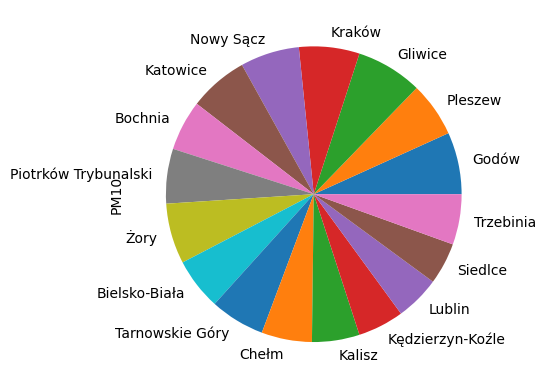

In [88]:
# df.loc['India']['PM10'].plot(kind='pie')
df.loc['Poland']['PM10'].plot(kind='pie')